# Fire/Smoke Detection Model Draft
Emily Donofrio

### Set up

In [1]:
import keras
import pandas as pd
import numpy

In [2]:
image_folder = 'images/'
full_data_path = 'image_data_full.csv'

In [3]:
sample_data = pd.read_csv('image_data_sample.csv')

In [4]:
sample_data.shape

(9531, 6)

In [5]:
sample_data.head()

,image_path,width,height,class,aspect_ratio,pixel_count
0,images/neitherFireNorSmoke_CV022026.jpg,690,714,neither,0.966387,492660
1,images/neitherFireNorSmoke_CV004700.jpg,325,450,neither,0.722222,146250
2,images/bothFireAndSmoke_CV014234.jpg,512,384,both,1.333333,196608
3,images/neitherFireNorSmoke_CV028776.jpg,524,650,neither,0.806154,340600
4,images/neitherFireNorSmoke_CV007468.jpg,800,533,neither,1.500938,426400


In [6]:
df = pd.read_csv(full_data_path)
df.shape

(95314, 6)

### Preprocessing

In [7]:
df = df.sort_values(by='image_path').reset_index(drop=True)

In [8]:
# map class labels to integers
class_mapping = {label: idx for idx, label in enumerate(df['class'].unique())}
df['class'] = df['class'].map(class_mapping)

In [9]:
class_mapping

{'both': 0, 'fire': 1, 'neither': 2, 'smoke': 3}

In [10]:
image_size = (180, 180)

dsTrain, dsTest = keras.utils.image_dataset_from_directory(
    image_folder,
    validation_split=0.2,
    subset="both",
    seed=28,
    labels=df['class'].tolist(), # Pass the sorted list of labels
    label_mode='categorical', # or 'binary', 'sparse', etc.
    image_size=image_size,
    batch_size=128
)

Found 95314 files belonging to 4 classes.
Using 76252 files for training.
Using 76252 files for training.
Using 19062 files for validation.
Using 19062 files for validation.


### Model 1: Predicting the 4 classes - dense sequential

In [11]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=5,          # Stop after 5 epochs with no improvement
    min_delta=0.001,     # Minimum change to qualify as improvement
    verbose=2,           # Display messages when callback takes action
    restore_best_weights=True # Restore weights from the best epoch
)

In [12]:
# build a simple model
model1 = keras.Sequential([
     keras.Input(shape=image_size + (3,) ), # each element of the image has a value for 3 colors
     keras.layers.Dense(20, activation="relu"),
     keras.layers.Flatten(),
     keras.layers.Dense(4, activation="sigmoid")
 ])

In [13]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 180, 180, 20)   │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 648000)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │     2,592,004 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,592,084 (9.89 MB)

 Trainable params: 2,592,084 (9.89 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model1.compile( loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
model1.fit(dsTrain, epochs = 10, validation_data=dsTest, callbacks=[early_stopping])

Epoch 1/10
430/596 ━━━━━━━━━━━━━━━━━━━━ 22s 137ms/step - accuracy: 0.4427 - loss: 606.7633

596/596 ━━━━━━━━━━━━━━━━━━━━ 94s 156ms/step - accuracy: 0.5304 - loss: 173.3975 - val_accuracy: 0.5772 - val_loss: 2.1095
Epoch 2/10
596/596 ━━━━━━━━━━━━━━━━━━━━ 94s 156ms/step - accuracy: 0.5304 - loss: 173.3975 - val_accuracy: 0.5772 - val_loss: 2.1095
Epoch 2/10
431/596 ━━━━━━━━━━━━━━━━━━━━ 21s 130ms/step - accuracy: 0.5994 - loss: 1.9290

596/596 ━━━━━━━━━━━━━━━━━━━━ 89s 149ms/step - accuracy: 0.6274 - loss: 1.2775 - val_accuracy: 0.6457 - val_loss: 0.7704
Epoch 3/10
596/596 ━━━━━━━━━━━━━━━━━━━━ 89s 149ms/step - accuracy: 0.6274 - loss: 1.2775 - val_accuracy: 0.6457 - val_loss: 0.7704
Epoch 3/10
458/596 ━━━━━━━━━━━━━━━━━━━━ 16s 117ms/step - accuracy: 0.6814 - loss: 0.6038

596/596 ━━━━━━━━━━━━━━━━━━━━ 82s 138ms/step - accuracy: 0.6866 - loss: 0.5058 - val_accuracy: 0.6515 - val_loss: 0.5577
Epoch 4/10
596/596 ━━━━━━━━━━━━━━━━━━━━ 82s 138ms/step - accuracy: 0.6866 - loss: 0.5058 - val_accuracy: 0.6515 - val_loss: 0.5577
Epoch 4/10
427/596 ━━━━━━━━━━━━━━━━━━━━ 19s 118ms/step - accuracy: 0.7097 - loss: 0.3984

596/596 ━━━━━━━━━━━━━━━━━━━━ 82s 138ms/step - accuracy: 0.7151 - loss: 0.3795 - val_accuracy: 0.6592 - val_loss: 0.5746
Epoch 5/10
596/596 ━━━━━━━━━━━━━━━━━━━━ 82s 138ms/step - accuracy: 0.7151 - loss: 0.3795 - val_accuracy: 0.6592 - val_loss: 0.5746
Epoch 5/10
455/596 ━━━━━━━━━━━━━━━━━━━━ 16s 118ms/step - accuracy: 0.7425 - loss: 0.3321

596/596 ━━━━━━━━━━━━━━━━━━━━ 82s 138ms/step - accuracy: 0.7450 - loss: 0.3242 - val_accuracy: 0.6595 - val_loss: 0.6546
Epoch 6/10
596/596 ━━━━━━━━━━━━━━━━━━━━ 82s 138ms/step - accuracy: 0.7450 - loss: 0.3242 - val_accuracy: 0.6595 - val_loss: 0.6546
Epoch 6/10
432/596 ━━━━━━━━━━━━━━━━━━━━ 19s 119ms/step - accuracy: 0.7640 - loss: 0.3090

596/596 ━━━━━━━━━━━━━━━━━━━━ 87s 145ms/step - accuracy: 0.7678 - loss: 0.2990 - val_accuracy: 0.6676 - val_loss: 0.6721
Epoch 7/10
596/596 ━━━━━━━━━━━━━━━━━━━━ 87s 145ms/step - accuracy: 0.7678 - loss: 0.2990 - val_accuracy: 0.6676 - val_loss: 0.6721
Epoch 7/10
448/596 ━━━━━━━━━━━━━━━━━━━━ 19s 130ms/step - accuracy: 0.7836 - loss: 0.2763

596/596 ━━━━━━━━━━━━━━━━━━━━ 90s 151ms/step - accuracy: 0.7861 - loss: 0.2742 - val_accuracy: 0.6731 - val_loss: 0.6983
Epoch 8/10
596/596 ━━━━━━━━━━━━━━━━━━━━ 90s 151ms/step - accuracy: 0.7861 - loss: 0.2742 - val_accuracy: 0.6731 - val_loss: 0.6983
Epoch 8/10
431/596 ━━━━━━━━━━━━━━━━━━━━ 20s 126ms/step - accuracy: 0.8006 - loss: 0.2531

596/596 ━━━━━━━━━━━━━━━━━━━━ 87s 147ms/step - accuracy: 0.8028 - loss: 0.2566 - val_accuracy: 0.6775 - val_loss: 0.7650
Epoch 8: early stopping
Restoring model weights from the end of the best epoch: 3.
596/596 ━━━━━━━━━━━━━━━━━━━━ 87s 147ms/step - accuracy: 0.8028 - loss: 0.2566 - val_accuracy: 0.6775 - val_loss: 0.7650
Epoch 8: early stopping
Restoring model weights from the end of the best epoch: 3.


In [16]:
import sklearn.metrics

In [17]:
predTrainN1 = model1.predict( dsTrain )
predTestN1 = model1.predict( dsTest )

447/596 ━━━━━━━━━━━━━━━━━━━━ 12s 85ms/step

596/596 ━━━━━━━━━━━━━━━━━━━━ 51s 85ms/step
596/596 ━━━━━━━━━━━━━━━━━━━━ 51s 85ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 13s 86ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 13s 86ms/step


In [18]:
y_pred_train = numpy.argmax(predTrainN1, axis=1)
y_pred_test  = numpy.argmax(predTestN1, axis=1)

In [19]:
# Extract labels from dsTrain for use in metrics
y_train = []
for images, labels in dsTrain:
    y_train.extend(labels.numpy())

# Extract labels from dsTest
y_test = []
for images, labels in dsTest:
    y_test.extend(labels.numpy())

# Convert the lists to numpy arrays and get class indices
y_train = numpy.array(y_train)
y_test = numpy.array(y_test)

# Convert one-hot encoded labels to class indices
y_train = numpy.argmax(y_train, axis=1)
y_test = numpy.argmax(y_test, axis=1)

print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)
print("Unique values in y_train:", numpy.unique(y_train))
print("Unique values in y_test:", numpy.unique(y_test))

2026-02-19 10:31:36.250066: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2026-02-19 10:31:36.250066: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Shape of y_train: (76252,)
Shape of y_test: (19062,)
Unique values in y_train: [0 1 2 3]
Unique values in y_test: [0 1 2 3]


2026-02-19 10:31:45.763183: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [20]:
print( sklearn.metrics.balanced_accuracy_score( y_train, y_pred_train) )
print( sklearn.metrics.balanced_accuracy_score( y_test, y_pred_test) )

0.25242592039178574
0.5725244650478005


In [21]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt



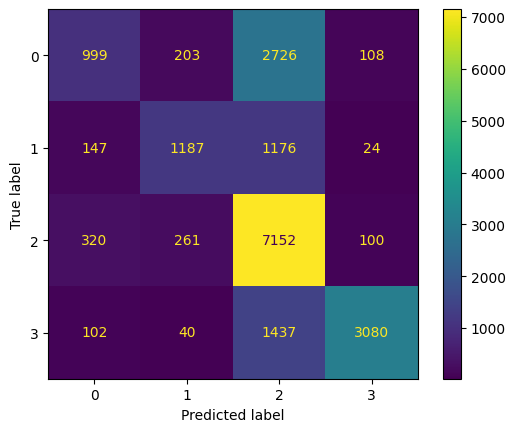

In [22]:
cm = confusion_matrix(y_test, y_pred_test)
sklearn.metrics.ConfusionMatrixDisplay(cm).plot()

In [23]:
# calculate precision, recall, f1-score
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.64      0.25      0.36      4036
           1       0.70      0.47      0.56      2534
           2       0.57      0.91      0.70      7833
           3       0.93      0.66      0.77      4659

    accuracy                           0.65     19062
   macro avg       0.71      0.57      0.60     19062
weighted avg       0.69      0.65      0.63     19062



Reminder of labels: {'both': 0, 'fire': 1, 'neither': 2, 'smoke': 3}
<br> <br>
Notes: <br>
- high recall in 'neither' category, lowest precision
- highest precision in smoke
- very low recall for 'both' category, most miscategorized 'both' are being predicted as 'neither'
- odd that training accuracy is much lower than test accuracy, may indicate volatility and not true model performance

### Model 2: Predicting the 4 classes - convolutional layers

In [24]:
model2 = keras.Sequential(
    [
        keras.Input(shape=image_size + (3,) ),
        keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dropout(0.5),
        keras.layers.Dense( 4, activation="sigmoid"),
    ]
)

In [25]:
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 118336)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 118336)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │       473,348 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 492,740 (1.88 MB)

 Trainable params: 492,740 (1.88 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model2.compile( loss='binary_crossentropy', metrics=['accuracy'])

In [27]:
model2.fit(dsTrain, epochs = 10, validation_data=dsTest, callbacks=[early_stopping])

Epoch 1/10
444/596 ━━━━━━━━━━━━━━━━━━━━ 1:29 589ms/step - accuracy: 0.5732 - loss: 16.0271

596/596 ━━━━━━━━━━━━━━━━━━━━ 385s 645ms/step - accuracy: 0.5968 - loss: 2.7170 - val_accuracy: 0.6179 - val_loss: 0.4412
Epoch 2/10
596/596 ━━━━━━━━━━━━━━━━━━━━ 385s 645ms/step - accuracy: 0.5968 - loss: 2.7170 - val_accuracy: 0.6179 - val_loss: 0.4412
Epoch 2/10
441/596 ━━━━━━━━━━━━━━━━━━━━ 1:33 600ms/step - accuracy: 0.6046 - loss: 0.7553

596/596 ━━━━━━━━━━━━━━━━━━━━ 382s 641ms/step - accuracy: 0.6067 - loss: 0.7408 - val_accuracy: 0.6004 - val_loss: 0.4461
Epoch 3/10
596/596 ━━━━━━━━━━━━━━━━━━━━ 382s 641ms/step - accuracy: 0.6067 - loss: 0.7408 - val_accuracy: 0.6004 - val_loss: 0.4461
Epoch 3/10
449/596 ━━━━━━━━━━━━━━━━━━━━ 1:23 571ms/step - accuracy: 0.6111 - loss: 2.2103

596/596 ━━━━━━━━━━━━━━━━━━━━ 368s 617ms/step - accuracy: 0.6115 - loss: 3.7038 - val_accuracy: 0.6152 - val_loss: 0.4373
Epoch 4/10
596/596 ━━━━━━━━━━━━━━━━━━━━ 368s 617ms/step - accuracy: 0.6115 - loss: 3.7038 - val_accuracy: 0.6152 - val_loss: 0.4373
Epoch 4/10
445/596 ━━━━━━━━━━━━━━━━━━━━ 1:25 569ms/step - accuracy: 0.6213 - loss: 1.3151

596/596 ━━━━━━━━━━━━━━━━━━━━ 367s 616ms/step - accuracy: 0.6183 - loss: 1.5527 - val_accuracy: 0.6095 - val_loss: 0.4157
Epoch 5/10
596/596 ━━━━━━━━━━━━━━━━━━━━ 367s 616ms/step - accuracy: 0.6183 - loss: 1.5527 - val_accuracy: 0.6095 - val_loss: 0.4157
Epoch 5/10
438/596 ━━━━━━━━━━━━━━━━━━━━ 1:30 571ms/step - accuracy: 0.6170 - loss: 3.4278

596/596 ━━━━━━━━━━━━━━━━━━━━ 368s 617ms/step - accuracy: 0.6134 - loss: 4.1985 - val_accuracy: 0.5956 - val_loss: 2.0230
Epoch 6/10
596/596 ━━━━━━━━━━━━━━━━━━━━ 368s 617ms/step - accuracy: 0.6134 - loss: 4.1985 - val_accuracy: 0.5956 - val_loss: 2.0230
Epoch 6/10
443/596 ━━━━━━━━━━━━━━━━━━━━ 1:28 577ms/step - accuracy: 0.6284 - loss: 3.4203

596/596 ━━━━━━━━━━━━━━━━━━━━ 370s 621ms/step - accuracy: 0.6248 - loss: 3.6831 - val_accuracy: 0.6275 - val_loss: 0.3990
Epoch 7/10
596/596 ━━━━━━━━━━━━━━━━━━━━ 370s 621ms/step - accuracy: 0.6248 - loss: 3.6831 - val_accuracy: 0.6275 - val_loss: 0.3990
Epoch 7/10
444/596 ━━━━━━━━━━━━━━━━━━━━ 1:27 572ms/step - accuracy: 0.6340 - loss: 0.4424

596/596 ━━━━━━━━━━━━━━━━━━━━ 369s 618ms/step - accuracy: 0.6286 - loss: 0.8687 - val_accuracy: 0.6071 - val_loss: 0.4318
Epoch 8/10
596/596 ━━━━━━━━━━━━━━━━━━━━ 369s 618ms/step - accuracy: 0.6286 - loss: 0.8687 - val_accuracy: 0.6071 - val_loss: 0.4318
Epoch 8/10
462/596 ━━━━━━━━━━━━━━━━━━━━ 1:16 569ms/step - accuracy: 0.6244 - loss: 8.5602

596/596 ━━━━━━━━━━━━━━━━━━━━ 367s 616ms/step - accuracy: 0.6286 - loss: 5.3019 - val_accuracy: 0.5553 - val_loss: 1.9016
Epoch 9/10
596/596 ━━━━━━━━━━━━━━━━━━━━ 367s 616ms/step - accuracy: 0.6286 - loss: 5.3019 - val_accuracy: 0.5553 - val_loss: 1.9016
Epoch 9/10
441/596 ━━━━━━━━━━━━━━━━━━━━ 1:33 605ms/step - accuracy: 0.6357 - loss: 4.9362

596/596 ━━━━━━━━━━━━━━━━━━━━ 385s 645ms/step - accuracy: 0.6337 - loss: 3.7202 - val_accuracy: 0.6293 - val_loss: 0.4129
Epoch 10/10
596/596 ━━━━━━━━━━━━━━━━━━━━ 385s 645ms/step - accuracy: 0.6337 - loss: 3.7202 - val_accuracy: 0.6293 - val_loss: 0.4129
Epoch 10/10
440/596 ━━━━━━━━━━━━━━━━━━━━ 1:28 567ms/step - accuracy: 0.6244 - loss: 13.7539

596/596 ━━━━━━━━━━━━━━━━━━━━ 366s 614ms/step - accuracy: 0.6293 - loss: 11.8199 - val_accuracy: 0.6321 - val_loss: 0.6000
Restoring model weights from the end of the best epoch: 6.
596/596 ━━━━━━━━━━━━━━━━━━━━ 366s 614ms/step - accuracy: 0.6293 - loss: 11.8199 - val_accuracy: 0.6321 - val_loss: 0.6000
Restoring model weights from the end of the best epoch: 6.


In [28]:
predTrainN2 = model2.predict( dsTrain )
predTestN2 = model2.predict( dsTest )

450/596 ━━━━━━━━━━━━━━━━━━━━ 27s 188ms/step

596/596 ━━━━━━━━━━━━━━━━━━━━ 112s 188ms/step
596/596 ━━━━━━━━━━━━━━━━━━━━ 112s 188ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 29s 192ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 29s 192ms/step


In [29]:
y_pred_train2 = numpy.argmax(predTrainN2, axis=1)
y_pred_test2  = numpy.argmax(predTestN2, axis=1)

In [30]:
print( sklearn.metrics.balanced_accuracy_score( y_train, y_pred_train2) )
print( sklearn.metrics.balanced_accuracy_score( y_test, y_pred_test2) )

0.24906947023114218
0.5421148001890173


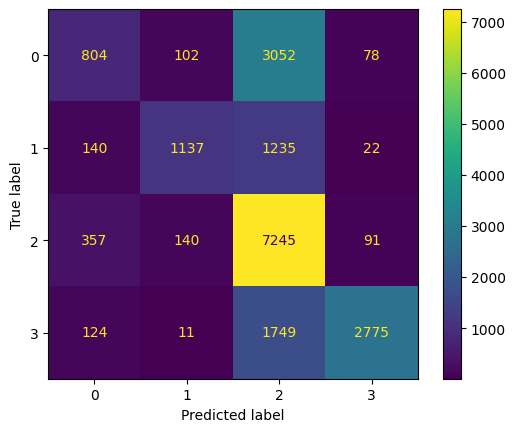

In [31]:
cm = confusion_matrix(y_test, y_pred_test2)
sklearn.metrics.ConfusionMatrixDisplay(cm).plot()

In [32]:
# calculate precision, recall, f1-score
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test2))

              precision    recall  f1-score   support

           0       0.56      0.20      0.29      4036
           1       0.82      0.45      0.58      2534
           2       0.55      0.92      0.69      7833
           3       0.94      0.60      0.73      4659

    accuracy                           0.63     19062
   macro avg       0.72      0.54      0.57     19062
weighted avg       0.68      0.63      0.60     19062



Reminder of labels: {'both': 0, 'fire': 1, 'neither': 2, 'smoke': 3}

Notes:
- 'Neither' still highest recall
- 'Both' being categorized as neither seems to have only gotten worse with this model than the prior model
- Smoke precision increased but in turn recall decreased
- Overall, this model seems to have increased precision in all the positive classes (either smoke, fire, or both) but decreased recall
- Training accuracy still lower than test accuracy (by a lot) which doesn't lend me confidence on true model performance

### Model 3: Predicting Smoke

In [33]:
df.head()

,image_path,width,height,class,aspect_ratio,pixel_count
0,images/bothFireAndSmoke_CV000000.jpg,1280,720,0,1.777778,921600
1,images/bothFireAndSmoke_CV000001.jpg,1280,720,0,1.777778,921600
2,images/bothFireAndSmoke_CV000002.jpg,1280,720,0,1.777778,921600
3,images/bothFireAndSmoke_CV000003.jpg,1280,720,0,1.777778,921600
4,images/bothFireAndSmoke_CV000004.jpg,1280,720,0,1.777778,921600


In [34]:
# smoke mapping
print(class_mapping)
smoke_mapping = {0: 1, 1: 0, 2: 0, 3: 1}
df['smoke_class'] = df['class'].map(smoke_mapping)
df[['class', 'smoke_class']].value_counts()

{'both': 0, 'fire': 1, 'neither': 2, 'smoke': 3}


class  smoke_class
2      0              39199
3      1              23414
0      1              20151
1      0              12550
Name: count, dtype: int64

In [35]:
dsTrain_smoke, dsTest_smoke = keras.utils.image_dataset_from_directory(
    image_folder,
    validation_split=0.2,
    subset="both",
    seed=28,
    labels=df['smoke_class'].tolist(), # Pass the sorted list of labels
    # label_mode='categorical', # or 'binary', 'sparse', etc.
    image_size=image_size,
    batch_size=128
)

Found 95314 files belonging to 2 classes.
Using 76252 files for training.
Using 76252 files for training.
Using 19062 files for validation.
Using 19062 files for validation.


In [36]:
# build a simple model
model3 = keras.Sequential([
     keras.Input(shape=image_size + (3,) ), # each element of the image has a value for 3 colors
     keras.layers.Dense(20, activation="relu"),
     keras.layers.Flatten(),
     keras.layers.Dense(1, activation="sigmoid")
 ])

In [37]:
model3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 180, 180, 20)   │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 648000)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │       648,001 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 648,081 (2.47 MB)

 Trainable params: 648,081 (2.47 MB)

 Non-trainable params: 0 (0.00 B)

In [38]:
model3.compile( loss='binary_crossentropy', metrics=['accuracy'])

In [39]:
model3.fit(dsTrain_smoke, epochs = 10, validation_data=dsTest_smoke, callbacks=[early_stopping])

Epoch 1/10
443/596 ━━━━━━━━━━━━━━━━━━━━ 17s 113ms/step - accuracy: 0.6288 - loss: 1469.3928

596/596 ━━━━━━━━━━━━━━━━━━━━ 79s 132ms/step - accuracy: 0.6765 - loss: 501.0211 - val_accuracy: 0.7005 - val_loss: 10.2676
Epoch 2/10
596/596 ━━━━━━━━━━━━━━━━━━━━ 79s 132ms/step - accuracy: 0.6765 - loss: 501.0211 - val_accuracy: 0.7005 - val_loss: 10.2676
Epoch 2/10
446/596 ━━━━━━━━━━━━━━━━━━━━ 16s 108ms/step - accuracy: 0.7255 - loss: 7.9124

596/596 ━━━━━━━━━━━━━━━━━━━━ 77s 129ms/step - accuracy: 0.7224 - loss: 3.8377 - val_accuracy: 0.7162 - val_loss: 0.9526
Epoch 3/10
596/596 ━━━━━━━━━━━━━━━━━━━━ 77s 129ms/step - accuracy: 0.7224 - loss: 3.8377 - val_accuracy: 0.7162 - val_loss: 0.9526
Epoch 3/10
470/596 ━━━━━━━━━━━━━━━━━━━━ 13s 108ms/step - accuracy: 0.7490 - loss: 0.6740

596/596 ━━━━━━━━━━━━━━━━━━━━ 77s 129ms/step - accuracy: 0.7593 - loss: 0.5769 - val_accuracy: 0.7434 - val_loss: 0.7097
Epoch 4/10
596/596 ━━━━━━━━━━━━━━━━━━━━ 77s 129ms/step - accuracy: 0.7593 - loss: 0.5769 - val_accuracy: 0.7434 - val_loss: 0.7097
Epoch 4/10
443/596 ━━━━━━━━━━━━━━━━━━━━ 16s 108ms/step - accuracy: 0.7829 - loss: 0.4874

596/596 ━━━━━━━━━━━━━━━━━━━━ 77s 129ms/step - accuracy: 0.7876 - loss: 0.4702 - val_accuracy: 0.7450 - val_loss: 0.7656
Epoch 5/10
596/596 ━━━━━━━━━━━━━━━━━━━━ 77s 129ms/step - accuracy: 0.7876 - loss: 0.4702 - val_accuracy: 0.7450 - val_loss: 0.7656
Epoch 5/10
470/596 ━━━━━━━━━━━━━━━━━━━━ 13s 108ms/step - accuracy: 0.8108 - loss: 0.4029

596/596 ━━━━━━━━━━━━━━━━━━━━ 77s 129ms/step - accuracy: 0.8118 - loss: 0.4023 - val_accuracy: 0.7482 - val_loss: 0.8729
Epoch 5: early stopping
Restoring model weights from the end of the best epoch: 1.
596/596 ━━━━━━━━━━━━━━━━━━━━ 77s 129ms/step - accuracy: 0.8118 - loss: 0.4023 - val_accuracy: 0.7482 - val_loss: 0.8729
Epoch 5: early stopping
Restoring model weights from the end of the best epoch: 1.


In [40]:
predTrainN3 = model3.predict( dsTrain_smoke )
predTestN3 = model3.predict( dsTest_smoke )

454/596 ━━━━━━━━━━━━━━━━━━━━ 11s 81ms/step

596/596 ━━━━━━━━━━━━━━━━━━━━ 49s 82ms/step
596/596 ━━━━━━━━━━━━━━━━━━━━ 49s 82ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 12s 81ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 12s 81ms/step


In [41]:
# Extract labels from dsTrain_smoke for use in metrics
y_train_smoke = []
for images, labels in dsTrain_smoke:
    y_train_smoke.extend(labels.numpy())

# Extract labels from dsTest
y_test_smoke = []
for images, labels in dsTest_smoke:
    y_test_smoke.extend(labels.numpy())

# Convert the lists to numpy arrays and get class indices
y_train_smoke = numpy.array(y_train_smoke)
y_test_smoke = numpy.array(y_test_smoke)


print("Shape of y_train_smoke:", y_train_smoke.shape)
print("Shape of y_test_smoke:", y_test_smoke.shape)
print("Unique values in y_train_smoke:", numpy.unique(y_train_smoke))
print("Unique values in y_test_smoke:", numpy.unique(y_test_smoke))



Shape of y_train_smoke: (76252,)
Shape of y_test_smoke: (19062,)
Unique values in y_train_smoke: [0 1]
Unique values in y_test_smoke: [0 1]


2026-02-19 11:44:30.442358: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [42]:
# look at ROC curve and AUC
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test_smoke, predTestN3)
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.7215312022328557


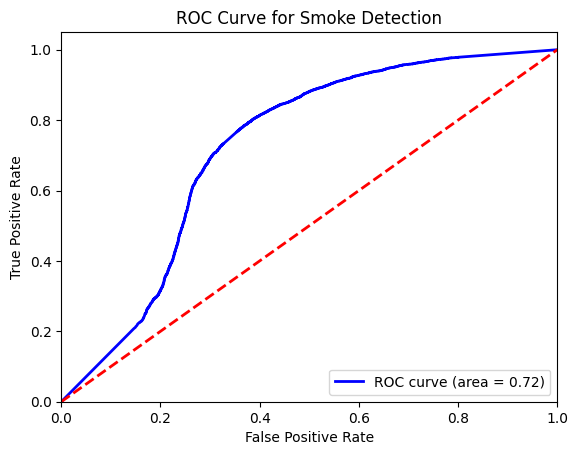

In [43]:
# visualize ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Smoke Detection')
plt.legend(loc="lower right")
plt.show()

In [44]:
# calculate precision and recall
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(
    y_test_smoke, predTestN3)

/var/folders/l3/n8mvslb57618czl67v6cxm840000gn/T/ipykernel_9589/1604669570.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="lower left")


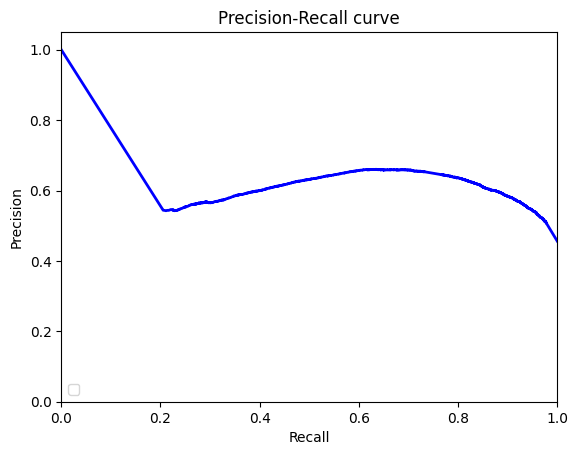

In [46]:
# Visualize Precision-Recall curve
plt.figure()
plt.plot(recall, precision, color='blue', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc="lower left")
plt.show()

In [47]:
# pick best threshold based on F1 score
from sklearn.metrics import f1_score
f1_scores = []
for thresh in thresholds:
    y_pred_thresh = (predTestN3 >= thresh).astype(int)
    f1 = f1_score(y_test_smoke, y_pred_thresh)
    f1_scores.append(f1)

In [48]:
# pick threshold with highest F1 score
best_thresh = thresholds[numpy.argmax(f1_scores)]
print("Best threshold based on F1 score:", best_thresh)

Best threshold based on F1 score: 0.2011235


In [49]:
print( sklearn.metrics.balanced_accuracy_score( y_train_smoke, predTrainN3 >= best_thresh ) )
print( sklearn.metrics.balanced_accuracy_score( y_test_smoke, predTestN3 >= best_thresh) )

0.5000530336190608
0.7013906314508265


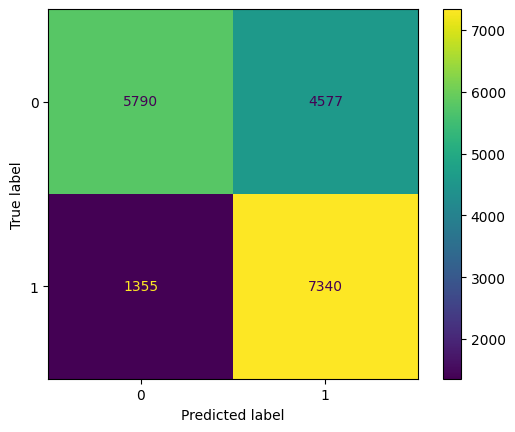

In [50]:
cm = confusion_matrix(y_test_smoke, predTestN3 > best_thresh)
sklearn.metrics.ConfusionMatrixDisplay(cm).plot()

In [51]:
# calculate precision, recall, f1-score
print(classification_report(y_test_smoke, predTestN3 >= best_thresh))

              precision    recall  f1-score   support

           0       0.81      0.56      0.66     10367
           1       0.62      0.84      0.71      8695

    accuracy                           0.69     19062
   macro avg       0.71      0.70      0.69     19062
weighted avg       0.72      0.69      0.68     19062



### Model 4: Predicting Fire

In [52]:
# fire mapping
print(class_mapping)
fire_mapping = {0: 1, 1: 1, 2: 0, 3: 0}
df['fire_class'] = df['class'].map(fire_mapping)
df[['class', 'fire_class']].value_counts()

{'both': 0, 'fire': 1, 'neither': 2, 'smoke': 3}


class  fire_class
2      0             39199
3      0             23414
0      1             20151
1      1             12550
Name: count, dtype: int64

In [53]:
dsTrain_fire, dsTest_fire = keras.utils.image_dataset_from_directory(
    image_folder,
    validation_split=0.2,
    subset="both",
    seed=28,
    labels=df['fire_class'].tolist(), # Pass the sorted list of labels
    # label_mode='categorical', # or 'binary', 'sparse', etc.
    image_size=image_size,
    batch_size=128
)

Found 95314 files belonging to 2 classes.
Using 76252 files for training.
Using 76252 files for training.
Using 19062 files for validation.
Using 19062 files for validation.


In [54]:
# build a simple model
model4 = keras.Sequential([
     keras.Input(shape=image_size + (3,) ), # each element of the image has a value for 3 colors
     keras.layers.Dense(20, activation="relu"),
     keras.layers.Flatten(),
     keras.layers.Dense(1, activation="sigmoid")
 ])

In [55]:
model4.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 180, 180, 20)   │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 648000)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │       648,001 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 648,081 (2.47 MB)

 Trainable params: 648,081 (2.47 MB)

 Non-trainable params: 0 (0.00 B)

In [56]:
model4.compile( loss='binary_crossentropy', metrics=['accuracy'])

In [57]:
model4.fit(dsTrain_fire, epochs = 10, validation_data=dsTest_fire, callbacks=[early_stopping])

Epoch 1/10
442/596 ━━━━━━━━━━━━━━━━━━━━ 22s 147ms/step - accuracy: 0.6610 - loss: 1550.2890

596/596 ━━━━━━━━━━━━━━━━━━━━ 108s 180ms/step - accuracy: 0.7058 - loss: 541.8341 - val_accuracy: 0.6950 - val_loss: 30.7705
Epoch 2/10
596/596 ━━━━━━━━━━━━━━━━━━━━ 108s 180ms/step - accuracy: 0.7058 - loss: 541.8341 - val_accuracy: 0.6950 - val_loss: 30.7705
Epoch 2/10
445/596 ━━━━━━━━━━━━━━━━━━━━ 20s 134ms/step - accuracy: 0.7454 - loss: 6.6998

596/596 ━━━━━━━━━━━━━━━━━━━━ 95s 159ms/step - accuracy: 0.7424 - loss: 3.1813 - val_accuracy: 0.7339 - val_loss: 0.7875
Epoch 3/10
596/596 ━━━━━━━━━━━━━━━━━━━━ 95s 159ms/step - accuracy: 0.7424 - loss: 3.1813 - val_accuracy: 0.7339 - val_loss: 0.7875
Epoch 3/10
471/596 ━━━━━━━━━━━━━━━━━━━━ 14s 119ms/step - accuracy: 0.7421 - loss: 0.6972

596/596 ━━━━━━━━━━━━━━━━━━━━ 85s 142ms/step - accuracy: 0.7433 - loss: 0.6367 - val_accuracy: 0.7300 - val_loss: 0.6435
Epoch 4/10
596/596 ━━━━━━━━━━━━━━━━━━━━ 85s 142ms/step - accuracy: 0.7433 - loss: 0.6367 - val_accuracy: 0.7300 - val_loss: 0.6435
Epoch 4/10
443/596 ━━━━━━━━━━━━━━━━━━━━ 18s 123ms/step - accuracy: 0.7628 - loss: 0.5461

596/596 ━━━━━━━━━━━━━━━━━━━━ 86s 143ms/step - accuracy: 0.7666 - loss: 0.5383 - val_accuracy: 0.7405 - val_loss: 0.6809
Epoch 5/10
596/596 ━━━━━━━━━━━━━━━━━━━━ 86s 143ms/step - accuracy: 0.7666 - loss: 0.5383 - val_accuracy: 0.7405 - val_loss: 0.6809
Epoch 5/10
469/596 ━━━━━━━━━━━━━━━━━━━━ 15s 119ms/step - accuracy: 0.7832 - loss: 0.4605

596/596 ━━━━━━━━━━━━━━━━━━━━ 84s 141ms/step - accuracy: 0.7859 - loss: 0.4736 - val_accuracy: 0.7309 - val_loss: 0.8181
Epoch 5: early stopping
Restoring model weights from the end of the best epoch: 1.
596/596 ━━━━━━━━━━━━━━━━━━━━ 84s 141ms/step - accuracy: 0.7859 - loss: 0.4736 - val_accuracy: 0.7309 - val_loss: 0.8181
Epoch 5: early stopping
Restoring model weights from the end of the best epoch: 1.


In [58]:
predTrainN4 = model4.predict( dsTrain_fire )
predTestN4 = model4.predict( dsTest_fire )

454/596 ━━━━━━━━━━━━━━━━━━━━ 12s 88ms/step

596/596 ━━━━━━━━━━━━━━━━━━━━ 53s 89ms/step
596/596 ━━━━━━━━━━━━━━━━━━━━ 53s 89ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 13s 87ms/step
149/149 ━━━━━━━━━━━━━━━━━━━━ 13s 87ms/step


In [59]:
# Extract labels from dsTrain_fire for use in metrics
y_train_fire = []
for images, labels in dsTrain_fire:
    y_train_fire.extend(labels.numpy())

# Extract labels from dsTest
y_test_fire = []
for images, labels in dsTest_fire:
    y_test_fire.extend(labels.numpy())

# Convert the lists to numpy arrays and get class indices
y_train_fire = numpy.array(y_train_fire)
y_test_fire = numpy.array(y_test_fire)

print("Shape of y_train_fire:", y_train_fire.shape)
print("Shape of y_test_fire:", y_test_fire.shape)
print("Unique values in y_train_fire:", numpy.unique(y_train_fire))
print("Unique values in y_test_fire:", numpy.unique(y_test_fire))


Shape of y_train_fire: (76252,)
Shape of y_test_fire: (19062,)
Unique values in y_train_fire: [0 1]
Unique values in y_test_fire: [0 1]


In [60]:
# look at ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_smoke, predTestN4)
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.6339752087464242


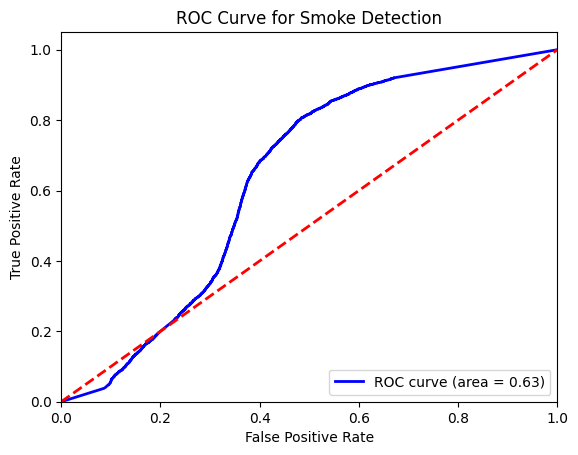

In [61]:
# visualize ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Smoke Detection')
plt.legend(loc="lower right")
plt.show()

In [62]:
# calculate precision and recall
precision, recall, thresholds = precision_recall_curve(
    y_test_fire, predTestN4)


/var/folders/l3/n8mvslb57618czl67v6cxm840000gn/T/ipykernel_9589/1604669570.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="lower left")


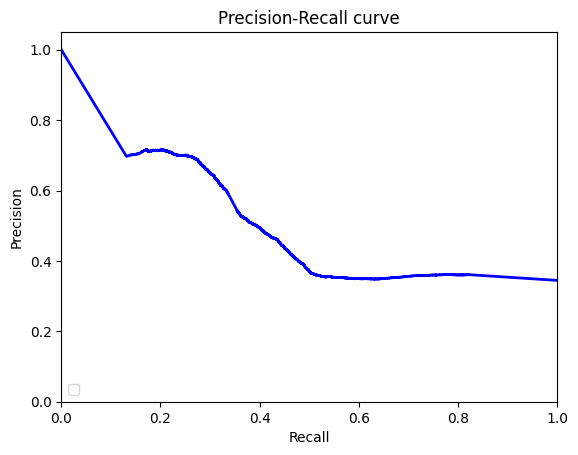

In [63]:
# Visualize Precision-Recall curve
plt.figure()
plt.plot(recall, precision, color='blue', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc="lower left")
plt.show()

In [64]:
f1_scores_fire = []
for thresh in thresholds:
    y_pred_thresh = (predTestN4 >= thresh).astype(int)
    f1 = f1_score(y_test_fire, y_pred_thresh)
    f1_scores_fire.append(f1)

In [65]:
# pick threshold with highest F1 score
best_thresh_fire = thresholds[numpy.argmax(f1_scores_fire)]
print("Best threshold based on F1 score:", best_thresh_fire)

Best threshold based on F1 score: 0.0


In [66]:
print( sklearn.metrics.balanced_accuracy_score( y_train_fire, predTrainN4 >= best_thresh_fire ) )
print( sklearn.metrics.balanced_accuracy_score( y_test_fire, predTestN4 >= best_thresh_fire) )

0.5
0.5


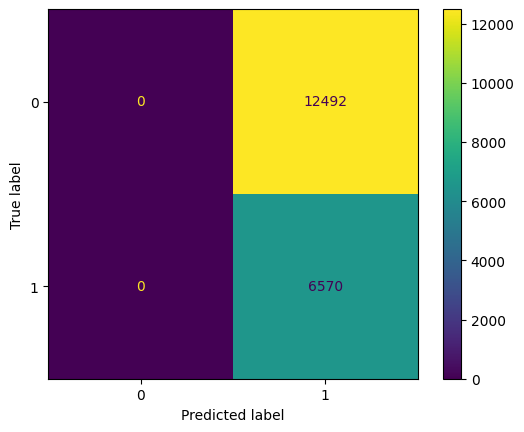

In [67]:
cm = confusion_matrix(y_test_fire, predTestN4 >= best_thresh_fire)
sklearn.metrics.ConfusionMatrixDisplay(cm).plot()

In [68]:
# calculate precision, recall, f1-score
print(classification_report(y_test_fire, predTestN4 >= best_thresh_fire))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     12492
           1       0.34      1.00      0.51      6570

    accuracy                           0.34     19062
   macro avg       0.17      0.50      0.26     19062
weighted avg       0.12      0.34      0.18     19062



/Users/emilydonofrio/Downloads/FASDD_CV/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/emilydonofrio/Downloads/FASDD_CV/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/emilydonofrio/Downloads/FASDD_CV/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_p

### Combining Model 3 & 4 predictions

In [69]:
df.head()

,image_path,width,height,class,aspect_ratio,pixel_count,smoke_class,fire_class
0,images/bothFireAndSmoke_CV000000.jpg,1280,720,0,1.777778,921600,1,1
1,images/bothFireAndSmoke_CV000001.jpg,1280,720,0,1.777778,921600,1,1
2,images/bothFireAndSmoke_CV000002.jpg,1280,720,0,1.777778,921600,1,1
3,images/bothFireAndSmoke_CV000003.jpg,1280,720,0,1.777778,921600,1,1
4,images/bothFireAndSmoke_CV000004.jpg,1280,720,0,1.777778,921600,1,1


In [70]:
smoke_scores = numpy.ravel(predTestN3)
smoke_scores

array([1.000000e+00, 3.132369e-01, 1.000000e+00, ..., 9.955320e-01,
       0.000000e+00, 6.139554e-04], shape=(19062,), dtype=float32)

In [71]:
fire_scores = numpy.ravel(predTestN4)
fire_scores

array([1.5078966e-05, 7.0999876e-02, 9.3818790e-01, ..., 6.7398101e-02,
       0.0000000e+00, 2.2227925e-05], shape=(19062,), dtype=float32)

In [72]:
# Create a dictionary
results_dict = {'class': y_test, 
             'smoke_class': y_test_smoke,
             'fire_class': y_test_fire,
             'm1_prediction': y_pred_test,
             'smoke_score': smoke_scores,
             'fire_score': fire_scores
             }


# Convert the dictionary to a pandas DataFrame
test_results_df = pd.DataFrame(results_dict)

In [73]:
test_results_df.head()

,class,smoke_class,fire_class,m1_prediction,smoke_score,fire_score
0,3,1,0,3,1.000000,0.000015
1,2,0,0,2,0.313237,0.071000
2,0,1,1,2,1.000000,0.938188
3,3,1,0,3,0.979876,0.231773
4,3,1,0,3,0.991969,0.237409


In [74]:
test_results_df[['class', 'smoke_class']].value_counts()

class  smoke_class
2      0              7833
3      1              4659
0      1              4036
1      0              2534
Name: count, dtype: int64

In [75]:
test_results_df[['class', 'fire_class']].value_counts()

class  fire_class
2      0             7833
3      0             4659
0      1             4036
1      1             2534
Name: count, dtype: int64

In [76]:
test_results_df['smoke_pred'] = (test_results_df['smoke_score'] >= best_thresh).astype('int')
test_results_df['fire_pred'] = (test_results_df['fire_score'] >= best_thresh_fire).astype('int')
test_results_df.head()

,class,smoke_class,fire_class,m1_prediction,smoke_score,fire_score,smoke_pred,fire_pred
0,3,1,0,3,1.000000,0.000015,1,1
1,2,0,0,2,0.313237,0.071000,1,1
2,0,1,1,2,1.000000,0.938188,1,1
3,3,1,0,3,0.979876,0.231773,1,1
4,3,1,0,3,0.991969,0.237409,1,1


In [77]:
# check same performance
print(classification_report(test_results_df['smoke_class'], test_results_df['smoke_pred']))

              precision    recall  f1-score   support

           0       0.81      0.56      0.66     10367
           1       0.62      0.84      0.71      8695

    accuracy                           0.69     19062
   macro avg       0.71      0.70      0.69     19062
weighted avg       0.72      0.69      0.68     19062



In [78]:
print(classification_report(test_results_df['fire_class'], test_results_df['fire_pred']))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     12492
           1       0.34      1.00      0.51      6570

    accuracy                           0.34     19062
   macro avg       0.17      0.50      0.26     19062
weighted avg       0.12      0.34      0.18     19062



/Users/emilydonofrio/Downloads/FASDD_CV/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/emilydonofrio/Downloads/FASDD_CV/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/emilydonofrio/Downloads/FASDD_CV/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_p

In [79]:
print(classification_report(test_results_df['class'], test_results_df['m1_prediction']))

              precision    recall  f1-score   support

           0       0.64      0.25      0.36      4036
           1       0.70      0.47      0.56      2534
           2       0.57      0.91      0.70      7833
           3       0.93      0.66      0.77      4659

    accuracy                           0.65     19062
   macro avg       0.71      0.57      0.60     19062
weighted avg       0.69      0.65      0.63     19062



In [80]:
class_mapping

{'both': 0, 'fire': 1, 'neither': 2, 'smoke': 3}

In [81]:
def combined_pred(row):
    if row['fire_pred'] == 1 and row['smoke_pred'] == 1:
        return 0
    elif row['fire_pred'] == 1:
        return 1
    elif row['smoke_pred'] == 1:
        return 3
    else:
        return 2

In [82]:
test_results_df['m34_combined_pred'] = test_results_df.apply(combined_pred, axis=1)
test_results_df.head()

,class,smoke_class,fire_class,m1_prediction,smoke_score,fire_score,smoke_pred,fire_pred,m34_combined_pred
0,3,1,0,3,1.000000,0.000015,1,1,0
1,2,0,0,2,0.313237,0.071000,1,1,0
2,0,1,1,2,1.000000,0.938188,1,1,0
3,3,1,0,3,0.979876,0.231773,1,1,0
4,3,1,0,3,0.991969,0.237409,1,1,0


#### Look at combined performance

In [83]:
print(classification_report(test_results_df['class'], test_results_df['m34_combined_pred']))

              precision    recall  f1-score   support

           0       0.26      0.76      0.39      4036
           1       0.19      0.53      0.28      2534
           2       0.00      0.00      0.00      7833
           3       0.00      0.00      0.00      4659

    accuracy                           0.23     19062
   macro avg       0.11      0.32      0.17     19062
weighted avg       0.08      0.23      0.12     19062



/Users/emilydonofrio/Downloads/FASDD_CV/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/emilydonofrio/Downloads/FASDD_CV/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/emilydonofrio/Downloads/FASDD_CV/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_p

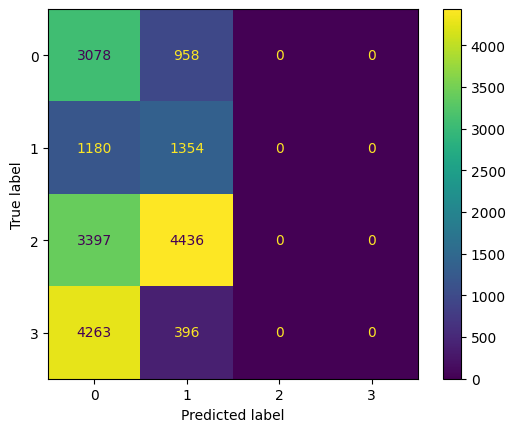

In [84]:
cm = confusion_matrix(test_results_df['class'], test_results_df['m34_combined_pred'])
sklearn.metrics.ConfusionMatrixDisplay(cm).plot()

### Model 5: Predicting 4 categories - functional convolutional model

In [85]:
# inputs
inputs = keras.Input(shape=image_size + (3,) )

# entry block
x = keras.layers.Rescaling(1.0 / 255)(inputs)
x = keras.layers.Conv2D(128, 3, strides=2, padding="same")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation("relu")(x)

previous_block_activation = x  # Set aside residual

for size in [256, 512, 728]:
    x = keras.layers.Activation("relu")(x)
    x = keras.layers.SeparableConv2D(size, 3, padding="same")(x)
    x = keras.layers.BatchNormalization()(x)

    x = keras.layers.Activation("relu")(x)
    x = keras.layers.SeparableConv2D(size, 3, padding="same")(x)
    x = keras.layers.BatchNormalization()(x)

    x = keras.layers.MaxPooling2D(3, strides=2, padding="same")(x)

    # Project residual
    residual = keras.layers.Conv2D(size, 1, strides=2, padding="same")(
        previous_block_activation
    )
    x = keras.layers.add([x, residual])  # Add back residual
    previous_block_activation = x  # Set aside next residual

x = keras.layers.SeparableConv2D(1024, 3, padding="same")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Activation("relu")(x)

x = keras.layers.GlobalAveragePooling2D()(x)

x = keras.layers.Dropout(0.25)(x)

outputs = keras.layers.Dense( 1, activation="sigmoid")(x)

model5 = keras.Model(inputs, outputs)

In [ ]:
model5.summary()

In [ ]:
model5.compile( loss='binary_crossentropy', metrics=['accuracy'])